In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines as lf
import seaborn as sns

In [41]:
# let's get our data
data = pd.read_csv('afib_434_4_Survival.csv')
columns = ['duration', 'event', 'race', 'sex', 'age1', 'age2']
data.columns = columns
temp = pd.read_csv('afib_434_Negative_Survival.csv')
temp.columns = columns
data = data.append(temp)

data.describe()

,duration,event,race,sex,age1,age2
count,955387.000000,955387.000000,955387.000000,955387.000000,955387.000000,955387.000000
mean,497.019215,0.621304,-4.048689,-4.484250,74.711811,75.974625
std,735.401300,0.485062,5.320932,4.748799,13.768365,13.773643
min,0.000000,0.000000,-9.000000,-9.000000,-99.000000,-99.000000
25%,0.000000,0.000000,-9.000000,-9.000000,67.000000,69.000000
50%,74.000000,1.000000,-9.000000,-9.000000,77.000000,79.000000
75%,783.000000,1.000000,1.000000,0.000000,84.000000,86.000000
max,7889.000000,1.000000,6.000000,1.000000,110.000000,110.000000


In [43]:
# age
data['sex'].value_counts()

-9    500451
 0    235071
 1    219865
Name: sex, dtype: int64

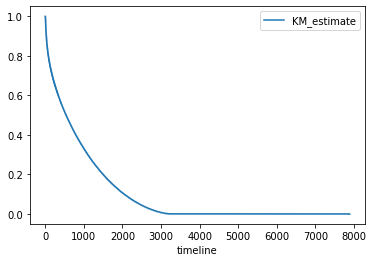

In [44]:
T, E = data['duration'], data['event']

kmf = lf.KaplanMeierFitter()
kmf.fit(T,E)
kmf.plot()

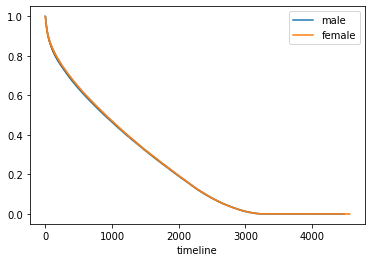

In [45]:
ax = plt.subplot(111)
male = (data['sex'] == 0)
female = (data['sex'] == 1)

kmf.fit(T[male], E[male], label='male')
kmf.plot(ax=ax)

kmf.fit(T[female], E[female], label='female')
kmf.plot(ax=ax)

In [46]:
results = lf.statistics.logrank_test(T[male], T[female], \
                                     E[male], E[female], alpha=.99)
results.print_summary()